In [1]:
import matplotlib.pyplot as plt
import corner as corner
import pandas as pd
import numpy as np
import h5py
import torch
import time

from populations.bbh_models import get_models
import populations.bbh_models as read_models
from populations.utils.flow import NFlow
from populations.Flowsclass_dev import FlowModel
from populations import gw_obs

from sample import sample
from populations.bbh_models import read_hdf5

glasflow is using its own internal version of nflows


PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
params = ['mchirp','q', 'chieff', 'z']
file_path='/Users/stormcolloms/Documents/PhD/Project_work/OneChannel_Flows/models_reduced.hdf5'
gw_path = '/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/gw_events'
observations, obsdata, p_theta, events = gw_obs.generate_observations(params, gw_path, \
                                            100, 'posteriors', None)

model_names, flow_oldmaps = read_models.get_models(file_path, ['CE'], params, use_flows=True, device='cpu')
model_names, flow_newmaps = read_models.get_models(file_path, ['CE'], params, use_flows=True, device='cpu')

100%|██████████| 1/1 [00:03<00:00,  3.57s/it]


In [3]:
flow_path="/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/flow_models/cosmo_weights/"
flow_oldmaps['CE'].load_model(flow_path, 'CE')

In [4]:
flow_newmaps['CE'].load_model(f'{flow_path}newmappings/', 'CE')

In [5]:
flow_newmaps['CE'].mappings

array([8.232875920000927, 100.0, 13.347090269689224, None,
       6.907754476512362, 10.009991975305043], dtype=object)

In [6]:
param = ['mchirp','q', 'chieff', 'z']
no_params = len(param)
channel_ids = {'CE':0, 'CHE':1,'GC':2,'NSC':3, 'SMT':4}
channel_id = channel_ids['CE'] #will be 0, 1, 2, 3, or 4
chi_b = [0.0,0.1,0.2,0.5]
alpha_CE = [0.2,0.5,1.0,2.,5.]
channel_samples = [4e6,864124,896611,582961, 4e6]
no_binaries = int(channel_samples[channel_id])
batch_size = 10000
total_hps=4

models_path ='/Users/stormcolloms/Documents/PhD/Project_work/OneChannel_Flows/models_reduced.hdf5'
popsynth_outputs = read_hdf5(models_path, 'CE') # read all data from hdf5 file

models_dict = dict.fromkeys(popsynth_outputs.keys())
weights_dict = dict.fromkeys(popsynth_outputs.keys())


for key in popsynth_outputs.keys():
    models_dict[key] = popsynth_outputs[key][param]
    weights_dict[key]= popsynth_outputs[key]['weight']

In [7]:
oldmapped = flow_oldmaps['CE'].map_obs(np.array([models_dict[(0,0)]]))
newmapped = flow_newmaps['CE'].map_obs(np.array([models_dict[(0,0)]]))

[[0.3755345  0.62673275 0.70713728 ... 0.4975519  0.50105701 0.19636928]]
[[0.90032513 0.69881433 0.78842191 ... 0.94148196 0.92467198 0.48333048]]
[[0.11878972 0.04374432 0.0815231  ... 0.02246356 0.17563687 0.15142925]]
[[0.14133764 0.2358796  0.26614096 ... 0.18726059 0.18857978 0.07390631]]
[[0.90032513 0.69881433 0.78842191 ... 0.94148196 0.92467198 0.48333048]]
[[0.11878972 0.04374432 0.0815231  ... 0.02246356 0.17563687 0.15142925]]


In [8]:
flow_oldmaps['CE'].mappings

array([8.232875920000927, 37.6363925625166, 13.347090269689224, None,
       6.907754476512362, 10.009991975305043], dtype=object)

(array([  2880.,   9758.,  23180.,  50679.,  95070., 164874., 293608.,
        184539.,  58857., 116555.]),
 array([-0.4464596 , -0.40795289, -0.36944617, -0.33093946, -0.29243274,
        -0.25392603, -0.21541932, -0.1769126 , -0.13840589, -0.09989917,
        -0.06139246]),
 <BarContainer object of 10 artists>)

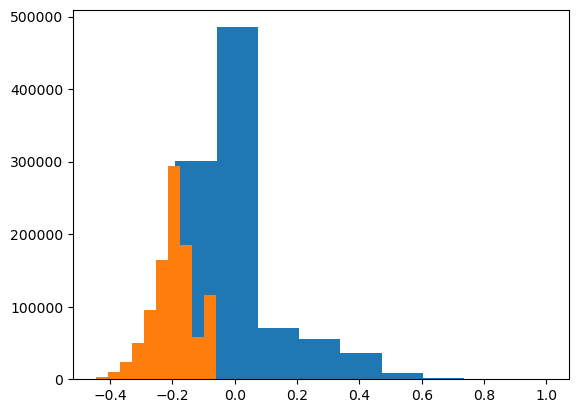

In [11]:
plt.hist(oldmapped[0,:,0])
plt.hist(newmapped[0,:,0])

In [ ]:
plt.hist(newmapped[:,:,0])